In [1]:
# !jupyter nbconvert --to script 2_myct_clean_analysis_XGBoost_targetwise_areawise.ipynb


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# df_neas = pd.read_csv('_df_neas_with_lags_model_input.csv') # df_neas_with_lags_model_input_myct.csv
# df_seas = pd.read_csv('_df_seas_with_lags_model_input.csv') # df_seas_with_lags_model_input_myct.csv

# df_neas = pd.read_csv('df_neas_with_lags_model_input_myct_first_try.csv') # df_neas_with_lags_model_input_myct.csv
# df_seas = pd.read_csv('df_seas_with_lags_model_input_myct_first_try.csv') # df_seas_with_lags_model_input_myct.csv

df_neas = pd.read_csv('df_neas_with_lags_model_input_myct.csv') # df_neas_with_lags_model_input_myct.csv
df_seas = pd.read_csv('df_seas_with_lags_model_input_myct.csv') # df_seas_with_lags_model_input_myct.csv


In [4]:
# 'cruise_no',
#  'cruise_id',
#  'date',

In [5]:
df_neas.head(3)

,Unnamed: 0,ssch,ssch5ctd,ichs,inscm,inscmd,inz,scmdctd,scmch,pscm,...,dsld_lag3,dsld_lag4,dsldo_lag1,dsldo_lag2,dsldo_lag3,dsldo_lag4,dslt_lag1,dslt_lag2,dslt_lag3,dslt_lag4
0,0,0.601891,0.075800,0.127111,0.385882,57.647059,440.811671,25.000000,1.817665,12.711000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.445522,0.362374,0.120000,0.385882,57.647059,184.284000,41.457627,1.265956,12.609468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.692553,0.792200,0.205278,0.900000,40.000000,0.180000,22.000000,1.480000,14.220000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# list(df_neas.columns)
# df_neas.columns

In [7]:
print(df_neas.shape)

(43, 134)


In [8]:
print(df_neas.shape)

(43, 134)


In [9]:
df_neas = df_neas.drop(columns='Unnamed: 0', errors='ignore')
df_seas = df_seas.drop(columns='Unnamed: 0', errors='ignore')
# df_neas = df_neas.drop(columns=['cruise_no', 'cruise_id', 'date'])
# df_seas = df_seas.drop(columns=['cruise_no', 'cruise_id', 'date'])
                       
# Drop columns that contain '_lag' in their name
df_neas = df_neas.loc[:, ~df_neas.columns.str.contains('_lag')]
df_seas = df_seas.loc[:, ~df_seas.columns.str.contains('_lag')]

In [10]:

pd.set_option('display.max_columns', None)  # Show all columns when printing a DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to multiple lines


In [11]:
print(df_neas.shape)
print(df_seas.shape)


(43, 33)
(44, 33)


In [12]:
df_neas.head(3)

,ssch,ssch5ctd,ichs,inscm,inscmd,inz,scmdctd,scmch,pscm,scmden,sp,sss,sst,sden,sdo,mld,oxy,omzt,omzb,bt_15,bt_20,std,dsld,dsldo,dslt,d/n,myctc_ton,myct_cwa_ton,cwafe,myctb_ton,cruise_no,cruise_id,date
0,0.601891,0.075800,0.127111,0.385882,57.647059,440.811671,25.000000,1.817665,12.711000,23.610000,187.950000,35.76,27.17,23.24,4.3,23.00,99,149.0,997.000000,266.0,149.0,3372.0,327.0,0.0100,100.0,1,0.000078,0.001141,0.001141,0.114061,313,313,2013-02-17
1,0.445522,0.362374,0.120000,0.385882,57.647059,184.284000,41.457627,1.265956,12.609468,23.390678,171.742461,29.75,36.38,29.75,4.1,22.00,89,123.0,561.916667,244.0,136.0,2787.0,380.0,0.1623,132.0,0,0.000161,0.023976,0.047952,0.161120,406,406,2024-08-05
2,0.692553,0.792200,0.205278,0.900000,40.000000,0.180000,22.000000,1.480000,14.220000,24.430000,57.170000,36.69,25.86,24.35,4.0,55.75,89,153.0,561.916667,342.0,158.0,2892.0,110.0,1.2700,120.0,1,0.005175,0.053737,0.053737,5.175000,347(II),347(II),2016-08-02


In [13]:
df_seas.head(3)

,ssch,ssch5ctd,ichs,inscm,inscmd,inz,scmdctd,scmch,pscm,scmden,sp,sss,sst,sden,sdo,mld,oxy,omzt,omzb,bt_15,bt_20,std,dsld,dsldo,dslt,d/n,myctc_ton,myct_cwa_ton,cwafe,myctb_ton,cruise_no,cruise_id,date
0,0.282003,1.1899,0.127111,0.385882,57.647059,440.811671,20.000000,1.817665,2.221700e+01,22.60,2.263300e+02,34.71,29.00,21.85,4.370,22.00,20,148.28125,561.916667,85.0,179.0,325.0,99.0,0.548,130.0,0,0.000100,0.000706,0.000353,0.170094,320,320,2013-06-10
1,0.178500,0.0068,0.070000,0.300000,40.000000,0.186046,35.000000,0.346441,2.886867e+01,22.83,1.771500e+02,35.71,29.40,22.46,4.725,24.00,48,148.28125,561.916667,70.0,157.0,1893.0,330.0,0.610,197.0,0,0.001400,0.015962,0.011737,5.823612,344(I),344(I),2015-07-09
2,0.114156,0.0195,0.127111,0.385882,57.647059,440.811671,56.322034,0.910000,1.000000e-12,23.27,1.000000e-12,35.75,29.12,22.59,4.200,55.75,76,148.28125,561.916667,180.0,109.0,2188.0,300.0,0.657,41.0,1,0.005915,0.155143,0.177730,4.318356,342,342,2015-07-28


In [14]:
print(list(df_neas.columns))


['ssch', 'ssch5ctd', 'ichs', 'inscm', 'inscmd', 'inz', 'scmdctd', 'scmch', 'pscm', 'scmden', 'sp', 'sss', 'sst', 'sden', 'sdo', 'mld', 'oxy', 'omzt', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'myctc_ton', 'myct_cwa_ton', 'cwafe', 'myctb_ton', 'cruise_no', 'cruise_id', 'date']


In [15]:
print(list(df_seas.columns))


['ssch', 'ssch5ctd', 'ichs', 'inscm', 'inscmd', 'inz', 'scmdctd', 'scmch', 'pscm', 'scmden', 'sp', 'sss', 'sst', 'sden', 'sdo', 'mld', 'oxy', 'omzt', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'myctc_ton', 'myct_cwa_ton', 'cwafe', 'myctb_ton', 'cruise_no', 'cruise_id', 'date']


# excluded columns for retrain after sensitivity

In [16]:
df_neas.drop('mld', axis=1, inplace=True)
df_seas.drop('mld', axis=1, inplace=True)

df_neas.drop('ssch5ctd', axis=1, inplace=True)
df_seas.drop('ssch5ctd', axis=1, inplace=True)

# df_neas.drop('inscmd', axis=1, inplace=True)
# df_seas.drop('inscmd', axis=1, inplace=True)

df_neas.drop('scmdctd', axis=1, inplace=True)
df_seas.drop('scmdctd', axis=1, inplace=True)

df_neas.drop('scmden', axis=1, inplace=True)
df_seas.drop('scmden', axis=1, inplace=True)


df_neas.drop('cruise_no', axis=1, inplace=True)
df_seas.drop('cruise_no', axis=1, inplace=True)


df_neas.drop('cruise_id', axis=1, inplace=True)
df_seas.drop('cruise_id', axis=1, inplace=True)


df_neas.drop('date', axis=1, inplace=True)
df_seas.drop('date', axis=1, inplace=True)


print(list(df_neas.columns))
print(list(df_seas.columns))

['ssch', 'ichs', 'inscm', 'inscmd', 'inz', 'scmch', 'pscm', 'sp', 'sss', 'sst', 'sden', 'sdo', 'oxy', 'omzt', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'myctc_ton', 'myct_cwa_ton', 'cwafe', 'myctb_ton']
['ssch', 'ichs', 'inscm', 'inscmd', 'inz', 'scmch', 'pscm', 'sp', 'sss', 'sst', 'sden', 'sdo', 'oxy', 'omzt', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'myctc_ton', 'myct_cwa_ton', 'cwafe', 'myctb_ton']


#  Physics-Informed & Cross-Derived Features

In [17]:

def add_physics_informed_features(df):
    """
    Adds physics-informed and cross-feature engineered variables to a cruise-based oceanographic DataFrame.
    Handles division-by-zero safely with a small epsilon.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame with required raw columns
    
    Returns:
        df (pd.DataFrame): DataFrame with new derived features added
    """

    # Avoid division by zero
    eps = 0.1
    
    # 1. Vertical gradients
    df['chl_grad_surf_sub'] = df['ichs'] - df['inscm']
    df['chl_depth_ratio'] = df['inscm'] / (df['inscmd'] + eps)
    df['do_gradient'] = df['sdo'] - df['dsldo']
    # df['density_strat'] = df['scmden'] - df['sden'] #------------------------------- excluded for retrain after sensitivity
    
    # 2. Mixed layer & OMZ structure
    df['omz_thickness'] = df['omzb'] - df['omzt']
    # df['mld_oxycline_diff'] = df['mld'] - df['oxy'] #------------------------------- excluded for retrain after sensitivity
    # df['mld_vs_scm_depth'] = df['mld'] - df['scmdctd'] #------------------------------- excluded for retrain after sensitivity
    ## df['mld_ratio'] = df['mld'] / (df['std'] + eps)
    # df['mld_ratio'] = df['mld'] / (df['dsld'] + eps) # new client reccomended instead of mld/std #------------------------------- excluded for retrain after sensitivity
    
    # 3. Thermocline structure
    df['thermo_span_15_20'] = df['bt_20'] - df['bt_15']
    df['temp_par_ratio'] = df['sst'] / (df['sp'] + eps)
    
    # 4. Fisheries-based features
    ## df['catch_per_effort'] = df['myctc_ton'] / (df['fe'] + eps)
    # df['biomass_to_catch'] = df['myctb_ton'] / (df['myctc_ton'] + eps) # target-derived feature
    # df['depth_adjusted_catch'] = df['myctc_ton'] / (df['std'] + eps) # target-derived feature
    ## df['chl_x_fe'] = df['ichs'] * df['fe']
    df['chl_x_oxy'] = df['ichs'] * df['sdo']
    
    # 5. Light & productivity proxies
    df['scm_par_ratio'] = df['pscm'] / (df['scmch'] + eps)
    df['surf_chl_ratio'] = df['ssch'] / (df['sst'] + eps)
    # df['scm_chl_density'] = df['scmch'] / (df['scmden'] + eps) #------------------------------- excluded for retrain after sensitivity

    return df

df_neas = add_physics_informed_features(df_neas)
df_seas = add_physics_informed_features(df_seas)


In [18]:
print(list(df_neas.columns))


['ssch', 'ichs', 'inscm', 'inscmd', 'inz', 'scmch', 'pscm', 'sp', 'sss', 'sst', 'sden', 'sdo', 'oxy', 'omzt', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'myctc_ton', 'myct_cwa_ton', 'cwafe', 'myctb_ton', 'chl_grad_surf_sub', 'chl_depth_ratio', 'do_gradient', 'omz_thickness', 'thermo_span_15_20', 'temp_par_ratio', 'chl_x_oxy', 'scm_par_ratio', 'surf_chl_ratio']


In [19]:
print(list(df_seas.columns))


['ssch', 'ichs', 'inscm', 'inscmd', 'inz', 'scmch', 'pscm', 'sp', 'sss', 'sst', 'sden', 'sdo', 'oxy', 'omzt', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'myctc_ton', 'myct_cwa_ton', 'cwafe', 'myctb_ton', 'chl_grad_surf_sub', 'chl_depth_ratio', 'do_gradient', 'omz_thickness', 'thermo_span_15_20', 'temp_par_ratio', 'chl_x_oxy', 'scm_par_ratio', 'surf_chl_ratio']


# XGBRegressor

# XGBRegressor - hyperparameter tuning

In [20]:
# !pip install graphviz

In [21]:

# from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

def nse_score(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

def select_correlated_features(df, target, threshold=0.15):
    base_features = [col for col in df.columns if "_lag" not in col and col != target and df[col].dtype in [np.float64, np.int64]]
    lag_features = [col for col in df.columns if "_lag" in col]

    corr = df[base_features + [target]].corr()[target].drop(target)
    selected_base = corr[abs(corr) > threshold].index.tolist()
    selected_lags = [col for col in lag_features if any(base in col for base in selected_base)]

    return selected_base + selected_lags


######################
# GridSearchCV
######################


from sklearn.model_selection import GridSearchCV  # Make sure this import exists
import os
import joblib

os.makedirs('saved_models/myct', exist_ok=True)


def tune_xgboost_model(df, target, exclude_cols=None, target_cols=None, area='?', n_iter=25, 
                       random_state=42, impute=True, verbose=True, n_splits=5):
    print(f"------------------- Predicting {target} -------------------")

    if exclude_cols is None:
        exclude_cols = []
    else:
        exclude_cols = list(exclude_cols)

    if target_cols is not None:
        exclude_cols += [col for col in target_cols if col != target]
        exclude_cols = list(set(exclude_cols))

    print(f'Excluded Features for model prediction for target = {target} : ', exclude_cols)
    print(" ")

    df_model = df.dropna(subset=[target]).copy()

    #================================================================================================#
    # To temporarly turned off the filter of highly correalted feature
    features = select_correlated_features(df_model, target, threshold=0.2)

    # features = [col for col in df_model.columns if col != target]

    print(f'Included Features for model prediction for target = {target}: ', features)
    print(" ")

    X = df_model[features]
    y = df_model[target]

    if impute:
        imputer = SimpleImputer(strategy='mean')
        X = pd.DataFrame(imputer.fit_transform(X), columns=features, index=X.index)

    # === Split before CV to ensure independent evaluation === #
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    param_grid = {
        'max_depth': [2, 3, 4],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [50, 100],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.7, 1.0],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [1, 3]
    }

    rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

    # GridSearchCV replaces RandomizedSearchCV here
    search = GridSearchCV(
        XGBRegressor(random_state=random_state),
        param_grid=param_grid,
        scoring=rmse_scorer,
        cv=KFold(n_splits=n_splits, shuffle=True, random_state=random_state),
        verbose=0,
        n_jobs=-1
    )

    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    best_params = search.best_params_

    # Final evaluation on untouched test set
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_nse = nse_score(y_train, y_train_pred)
    test_nse = nse_score(y_test, y_test_pred)

    metrics_df = pd.DataFrame([{
        "area": area,
        "target": target,
        "train_rmse": round(train_rmse, 3),
        "test_rmse": round(test_rmse, 3),
        "train_r2": round(train_r2, 3),
        "test_r2": round(test_r2, 3),
        "train_nse": round(train_nse, 3),
        "test_nse": round(test_nse, 3),
        "status": "Overfitting" if train_r2 - test_r2 > 0.3 else "Underfitting" if train_r2 < 0.3 and test_r2 < 0.3 else "Good"
    }])

    if verbose:
        print(metrics_df.to_string(index=False))
        print(f"\nBest hyperparameters for {target} | {area} : \n{best_params}")
        print(" ")
        print(f"Highly correlated Features : \n{features}")
        print(" ")

    importances = best_model.feature_importances_
    importance_feature = pd.DataFrame({
        'feature': features,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    # --- Persist trained artifacts for reproducible sensitivity analysis ---
    # filename base
    fname_base = f"saved_models/myct/{area}_{target}"

    # Save the trained model
    joblib.dump(best_model, fname_base + "_model.pkl")

    # Save imputer (if used) so you can transform test/new data the same way
    try:
        joblib.dump(imputer, fname_base + "_imputer.pkl")
    except NameError:
        # imputer not defined (impute=False); skip saving
        pass

    # Save the exact test split used for final evaluation (so sensitivity uses same holdout)
    try:
        joblib.dump((X_test, y_test), fname_base + "_test_split.pkl")
    except NameError:
        # If X_test/y_test not in scope, skip (but they should be defined in your function)
        pass

    # Save features list and importance dataframe for reference
    joblib.dump(features, fname_base + "_features.pkl")
    joblib.dump(importance_feature, fname_base + "_importance_feature.pkl")

    
    if verbose:
        print("\nTop 10 Feature Importances:")
        print(importance_feature.head(10).to_string(index=False))

    return best_model, metrics_df, best_params, features, importance_feature


In [22]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

def plot_feature_importances(importance_df, target, area, top_n=10):
    top = importance_df.head(top_n)
    plt.figure(figsize=(10, 6))
    plt.barh(top['feature'], top['importance'])
    plt.gca().invert_yaxis()
    plt.title(f"Top {top_n} Feature Importances: {target} | {area}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

------------------- Predicting myctc_ton -------------------
Excluded Features for model prediction for target = myctc_ton :  ['area', 'cwafe', 'd/n', 'myctb_ton', 'myct_cwa_ton']
 
Included Features for model prediction for target = myctc_ton:  ['ssch', 'ichs', 'inscm', 'inscmd', 'inz', 'scmch', 'sp', 'sss', 'sst', 'sden', 'omzb', 'dsld', 'dslt', 'd/n', 'myct_cwa_ton', 'cwafe', 'myctb_ton', 'chl_depth_ratio', 'omz_thickness', 'temp_par_ratio', 'chl_x_oxy', 'surf_chl_ratio']
 
area    target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse      status
NEAS myctc_ton         0.0        0.0     0.972     0.49      0.972      0.49 Overfitting

Best hyperparameters for myctc_ton | NEAS : 
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
 
Highly correlated Features : 
['ssch', 'ichs', 'inscm', 'inscmd', 'inz', 'scmch', 'sp', 'sss', 'sst', 'sden', 'omzb', 'dsld', 'dslt', 'd/n', 'myct_cwa_ton

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


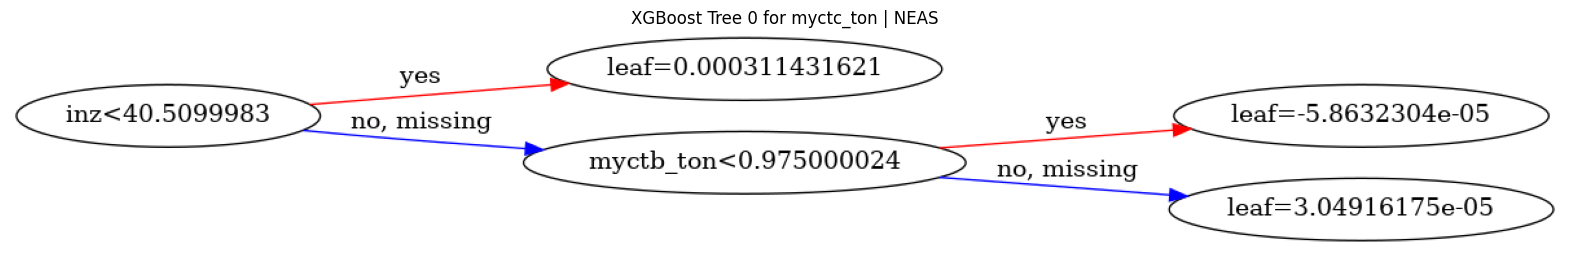

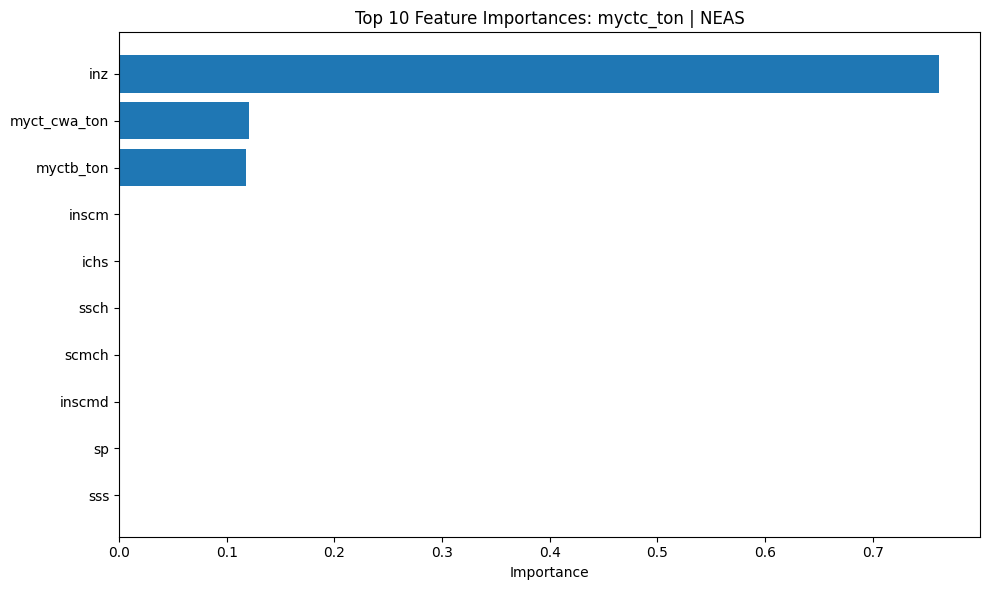

------------------- Predicting myct_cwa_ton -------------------
Excluded Features for model prediction for target = myct_cwa_ton :  ['area', 'myctc_ton', 'cwafe', 'd/n', 'myctb_ton']
 
Included Features for model prediction for target = myct_cwa_ton:  ['ichs', 'inscm', 'inscmd', 'scmch', 'sp', 'sss', 'sden', 'omzb', 'bt_20', 'myctc_ton', 'cwafe', 'myctb_ton', 'chl_depth_ratio', 'omz_thickness', 'temp_par_ratio', 'chl_x_oxy']
 
area       target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
NEAS myct_cwa_ton         0.0        0.0       1.0    0.933        1.0     0.933   Good

Best hyperparameters for myct_cwa_ton | NEAS : 
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
 
Highly correlated Features : 
['ichs', 'inscm', 'inscmd', 'scmch', 'sp', 'sss', 'sden', 'omzb', 'bt_20', 'myctc_ton', 'cwafe', 'myctb_ton', 'chl_depth_ratio', 'omz_thickness', 'temp_par_ratio', 'chl_x_oxy']

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


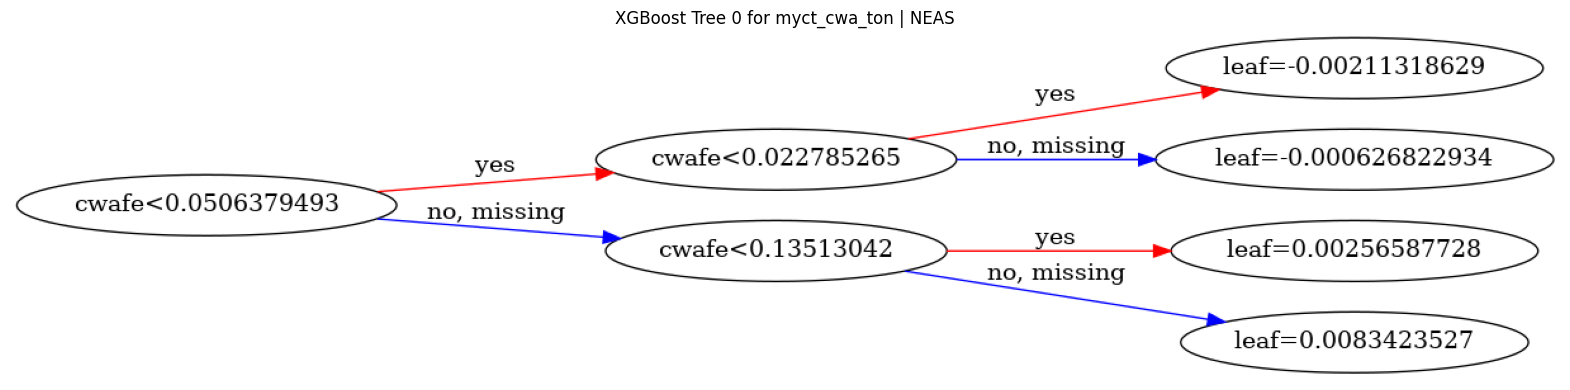

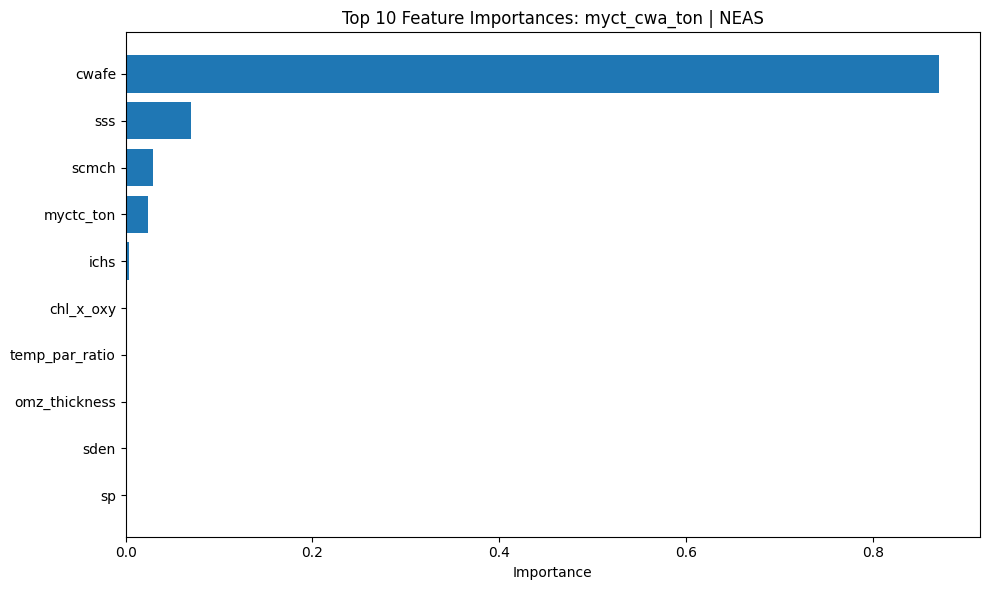

------------------- Predicting cwafe -------------------
Excluded Features for model prediction for target = cwafe :  ['area', 'myctc_ton', 'd/n', 'myctb_ton', 'myct_cwa_ton']
 
Included Features for model prediction for target = cwafe:  ['ichs', 'inscm', 'inscmd', 'scmch', 'sp', 'oxy', 'omzb', 'bt_20', 'myctc_ton', 'myct_cwa_ton', 'myctb_ton', 'chl_depth_ratio', 'omz_thickness', 'temp_par_ratio', 'chl_x_oxy', 'scm_par_ratio']
 
area target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
NEAS  cwafe         0.0      0.001       1.0    0.722        1.0     0.722   Good

Best hyperparameters for cwafe | NEAS : 
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
 
Highly correlated Features : 
['ichs', 'inscm', 'inscmd', 'scmch', 'sp', 'oxy', 'omzb', 'bt_20', 'myctc_ton', 'myct_cwa_ton', 'myctb_ton', 'chl_depth_ratio', 'omz_thickness', 'temp_par_ratio', 'chl_x_oxy', 'scm_par_ratio']


/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


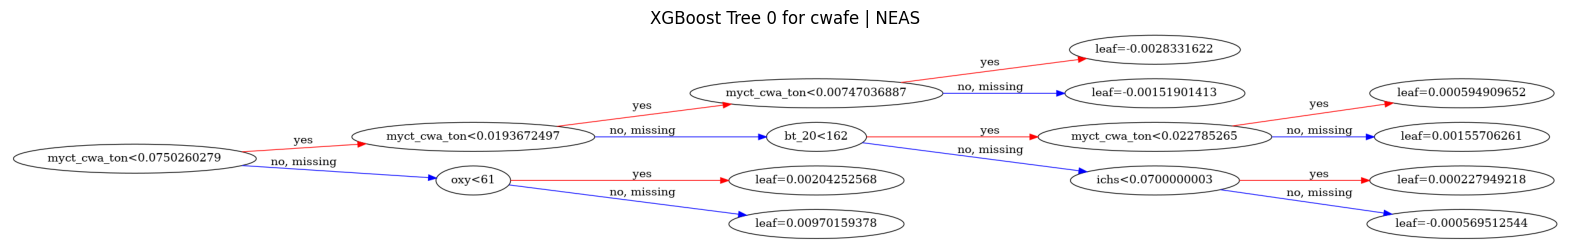

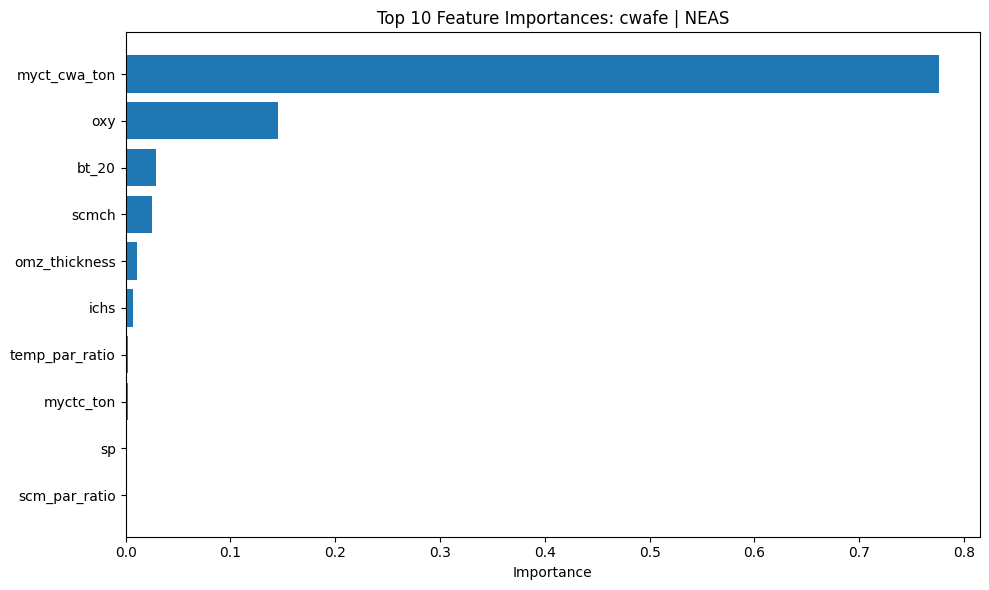

------------------- Predicting myctb_ton -------------------
Excluded Features for model prediction for target = myctb_ton :  ['area', 'myctc_ton', 'cwafe', 'd/n', 'myct_cwa_ton']
 
Included Features for model prediction for target = myctb_ton:  ['ssch', 'ichs', 'inscm', 'inscmd', 'inz', 'scmch', 'sp', 'sss', 'sst', 'sden', 'dsld', 'dsldo', 'dslt', 'd/n', 'myctc_ton', 'myct_cwa_ton', 'cwafe', 'chl_depth_ratio', 'do_gradient', 'chl_x_oxy', 'surf_chl_ratio']
 
area    target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
NEAS myctb_ton       0.001      3.198       1.0    0.812        1.0     0.812   Good

Best hyperparameters for myctb_ton | NEAS : 
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1.0}
 
Highly correlated Features : 
['ssch', 'ichs', 'inscm', 'inscmd', 'inz', 'scmch', 'sp', 'sss', 'sst', 'sden', 'dsld', 'dsldo', 'dslt', 'd/n', 'myctc_ton', 'myct_cwa_ton', 'cwafe', '

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


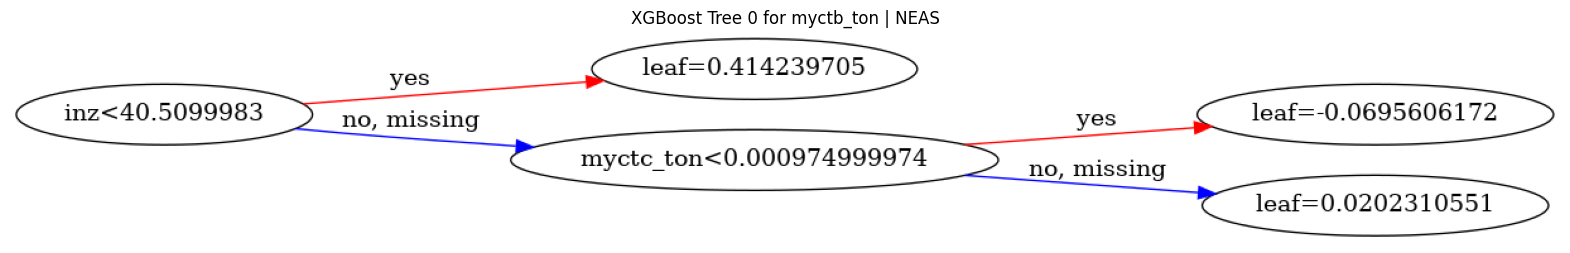

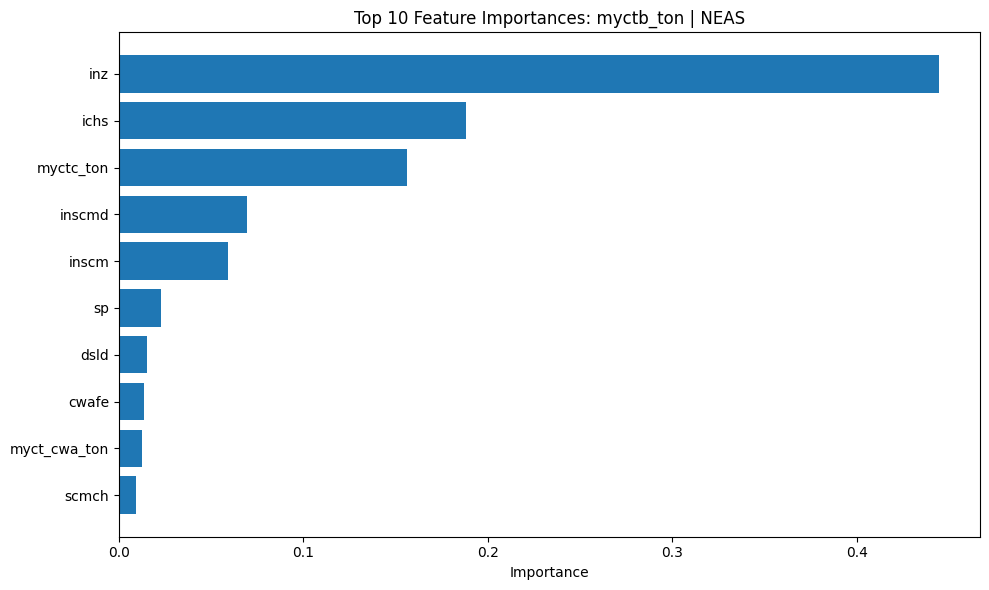


====== All Target Summary ======
area       target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse      status
NEAS    myctc_ton       0.000      0.000     0.972    0.490      0.972     0.490 Overfitting
NEAS myct_cwa_ton       0.000      0.000     1.000    0.933      1.000     0.933        Good
NEAS        cwafe       0.000      0.001     1.000    0.722      1.000     0.722        Good
NEAS    myctb_ton       0.001      3.198     1.000    0.812      1.000     0.812        Good
CPU times: user 7.77 s, sys: 431 ms, total: 8.21 s
Wall time: 14.6 s


In [23]:
%%time

# exclude = ['area', 'd/n']
# target_cols = ['myctc_ton', 'myct_cwa_ton', 'cwafe', 'myctb_ton'] #'myct_cwa_ton'

# for target in target_cols:
#     best_model, best_params, best_rmse, features, importance_feature = tune_xgboost_model(
#         df_neas, target=target, exclude_cols=exclude, target_cols=target_cols, area='NEAS', n_iter=50
#     )

#     # Plot the first tree of the best model
    
#     plot_tree(best_model, num_trees=0, rankdir='LR')
#     fig = plt.gcf()
#     fig.set_size_inches(20, 15)
#     plt.title(f"XGBoost Tree 0 for {target} | NEAS")
#     plt.show()

#     # Plot feature importances
#     plot_feature_importances(importance_feature, target=target, area='NEAS')


# %%time

exclude = ['area', 'd/n']
target_cols = ['myctc_ton', 'myct_cwa_ton', 'cwafe', 'myctb_ton']
all_metrics = []

for target in target_cols:
    best_model, metrics_df, best_params, features, importance_feature = tune_xgboost_model(
        df_neas, target=target, exclude_cols=exclude, target_cols=target_cols, area='NEAS', n_iter=50
    )

    all_metrics.append(metrics_df)  # <-- collect each result

    # Plot the first tree of the best model
    plot_tree(best_model, num_trees=0, rankdir='LR')
    fig = plt.gcf()
    fig.set_size_inches(20, 15)
    plt.title(f"XGBoost Tree 0 for {target} | NEAS")
    plt.show()

    # Plot feature importances
    plot_feature_importances(importance_feature, target=target, area='NEAS')

final_metrics_df = pd.concat(all_metrics, ignore_index=True)
print("\n====== All Target Summary ======")
print(final_metrics_df.to_string(index=False))


------------------- Predicting myctc_ton -------------------
Excluded Features for model prediction for target = myctc_ton :  ['area', 'cwafe', 'd/n', 'myctb_ton', 'myct_cwa_ton']
 
Included Features for model prediction for target = myctc_ton:  ['ichs', 'inscmd', 'inz', 'scmch', 'pscm', 'sst', 'sden', 'oxy', 'omzb', 'bt_15', 'bt_20', 'dsld', 'dsldo', 'dslt', 'd/n', 'myct_cwa_ton', 'cwafe', 'myctb_ton', 'chl_grad_surf_sub', 'chl_depth_ratio', 'do_gradient', 'omz_thickness', 'thermo_span_15_20']
 
area    target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
SEAS myctc_ton         0.0        0.0     0.976    0.991      0.976     0.991   Good

Best hyperparameters for myctc_ton | SEAS : 
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 3, 'subsample': 0.8}
 
Highly correlated Features : 
['ichs', 'inscmd', 'inz', 'scmch', 'pscm', 'sst', 'sden', 'oxy', 'omzb', 'bt_15', 'bt_20', 'dsld', 'dsldo', 'dslt'

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


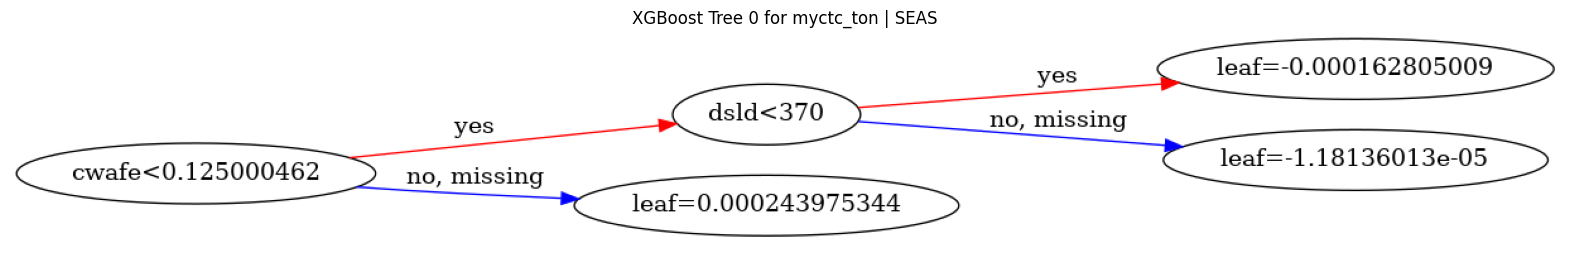

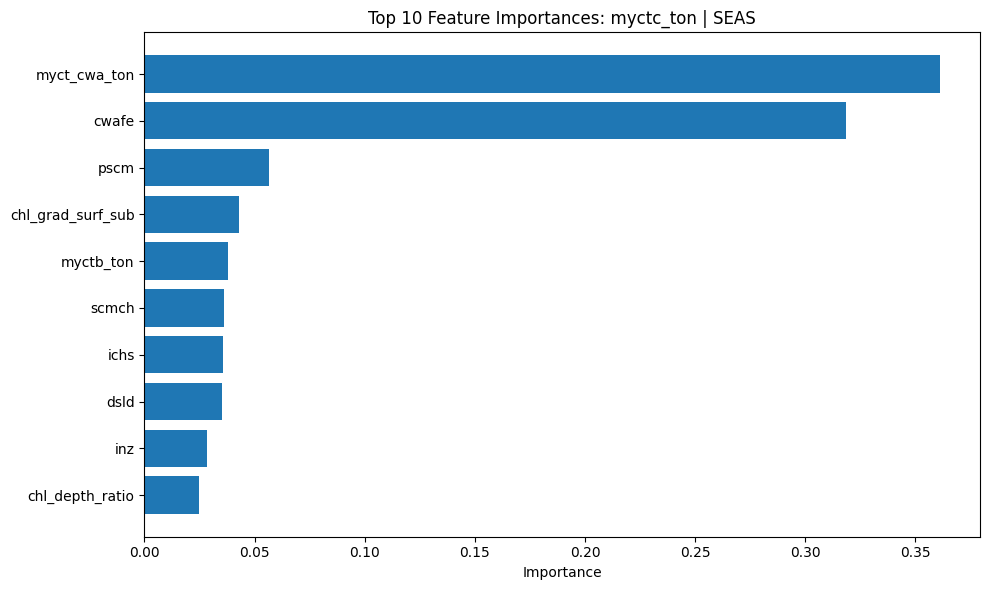

------------------- Predicting myct_cwa_ton -------------------
Excluded Features for model prediction for target = myct_cwa_ton :  ['area', 'myctc_ton', 'cwafe', 'd/n', 'myctb_ton']
 
Included Features for model prediction for target = myct_cwa_ton:  ['ichs', 'inscmd', 'inz', 'scmch', 'pscm', 'sp', 'sss', 'sst', 'sden', 'sdo', 'oxy', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'myctc_ton', 'cwafe', 'myctb_ton', 'chl_grad_surf_sub', 'chl_depth_ratio', 'do_gradient', 'omz_thickness', 'thermo_span_15_20', 'chl_x_oxy']
 
area       target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
SEAS myct_cwa_ton         0.0        0.0     0.976    0.997      0.976     0.997   Good

Best hyperparameters for myct_cwa_ton | SEAS : 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 3, 'subsample': 0.8}
 
Highly correlated Features : 
['ichs', 'inscmd', 'inz', 'scmch', 'pscm', 'sp', 'sss', 'sst'

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


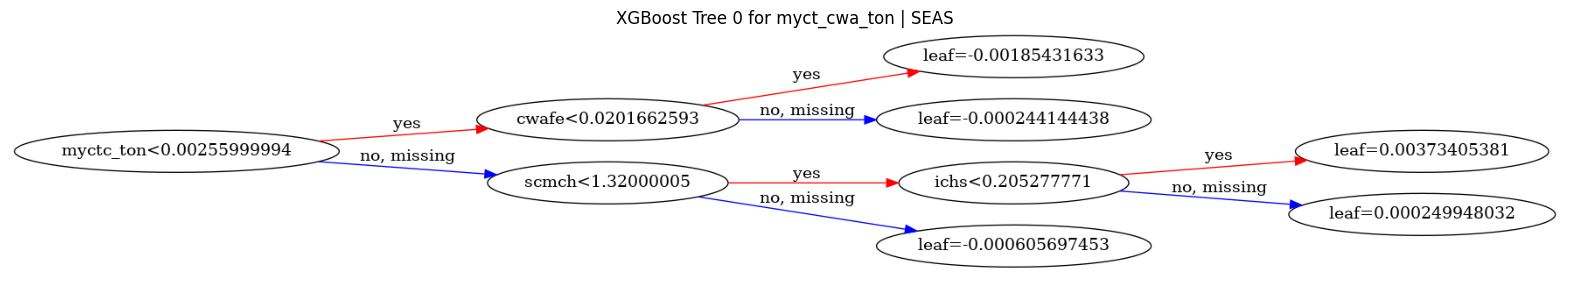

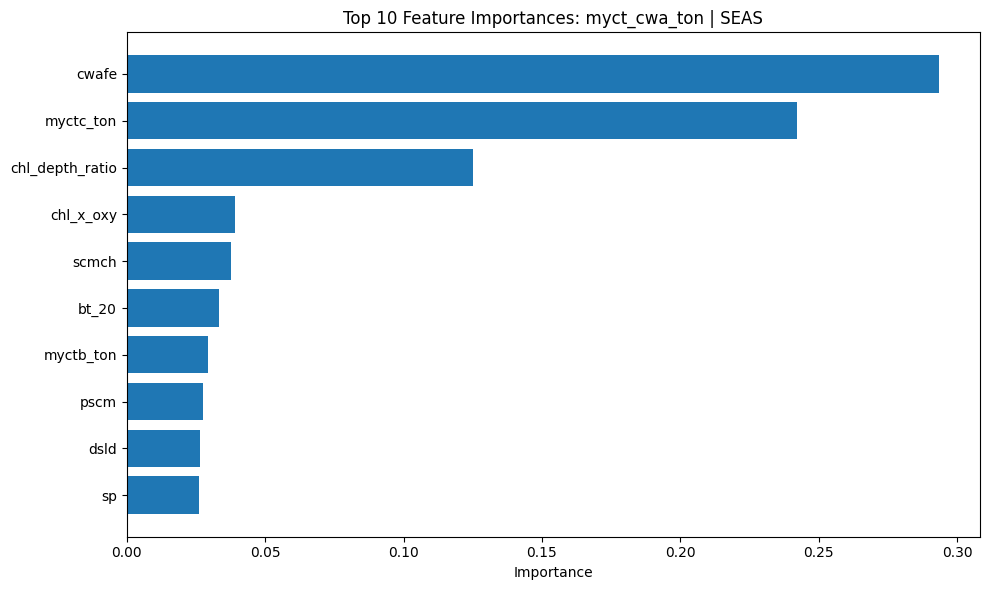

------------------- Predicting cwafe -------------------
Excluded Features for model prediction for target = cwafe :  ['area', 'myctc_ton', 'd/n', 'myctb_ton', 'myct_cwa_ton']
 
Included Features for model prediction for target = cwafe:  ['ichs', 'inscmd', 'inz', 'scmch', 'pscm', 'sp', 'sss', 'sst', 'sden', 'oxy', 'omzb', 'bt_15', 'bt_20', 'std', 'dsld', 'dsldo', 'dslt', 'd/n', 'myctc_ton', 'myct_cwa_ton', 'myctb_ton', 'chl_depth_ratio', 'do_gradient', 'omz_thickness', 'thermo_span_15_20', 'chl_x_oxy', 'scm_par_ratio']
 
area target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
SEAS  cwafe         0.0        0.0      0.99    0.994       0.99     0.994   Good

Best hyperparameters for cwafe | SEAS : 
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 3, 'subsample': 0.8}
 
Highly correlated Features : 
['ichs', 'inscmd', 'inz', 'scmch', 'pscm', 'sp', 'sss', 'sst', 'sden', 'oxy', 'omzb', 'bt_15', 'bt_2

/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


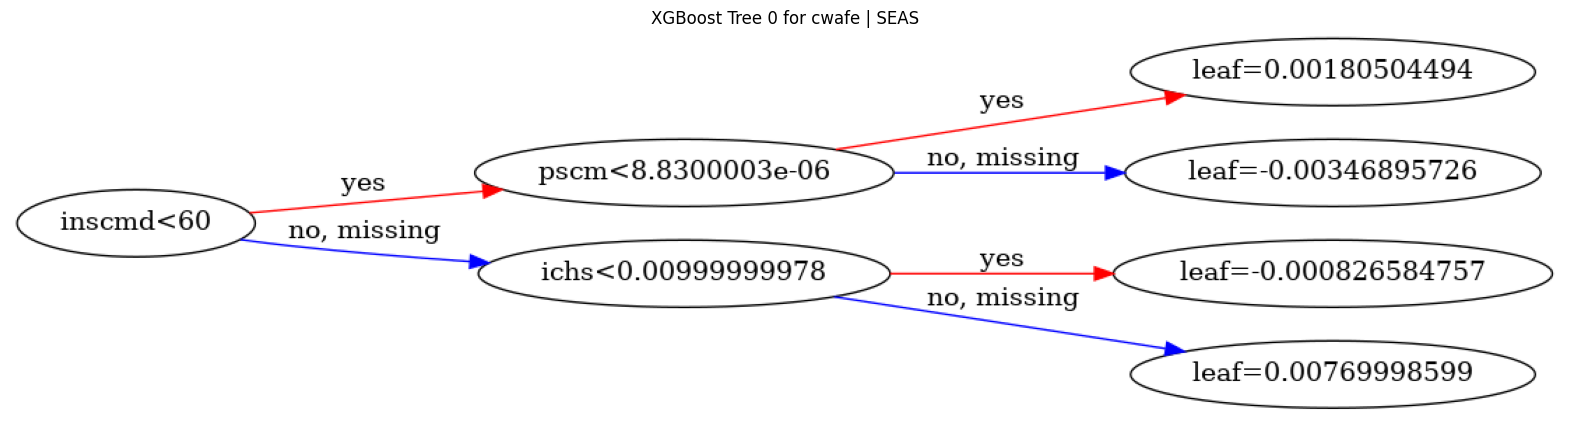

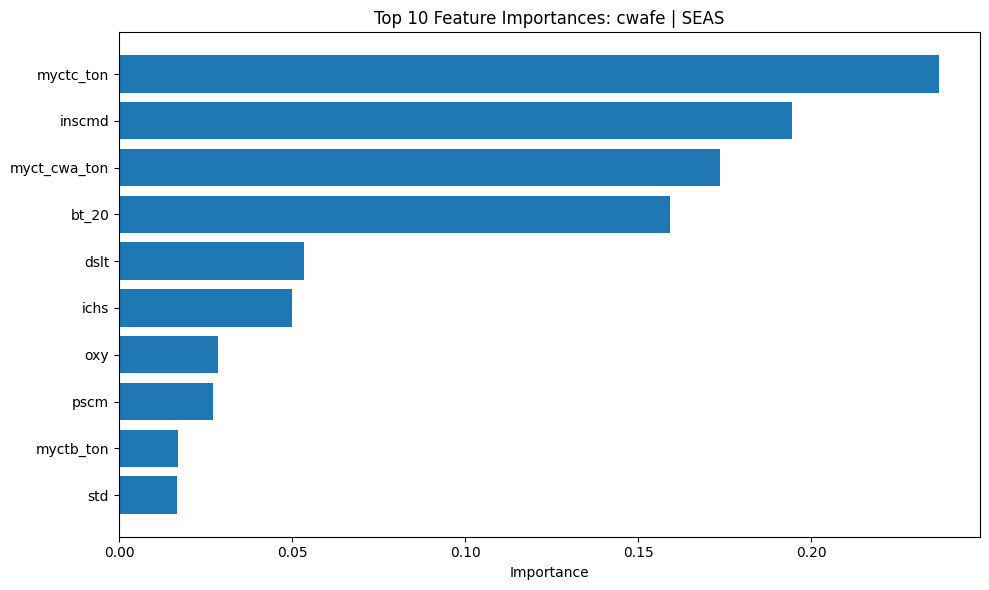

------------------- Predicting myctb_ton -------------------
Excluded Features for model prediction for target = myctb_ton :  ['area', 'myctc_ton', 'cwafe', 'd/n', 'myct_cwa_ton']
 
Included Features for model prediction for target = myctb_ton:  ['inscmd', 'inz', 'sp', 'sst', 'sden', 'omzt', 'myctc_ton', 'myct_cwa_ton', 'cwafe', 'omz_thickness']
 
area    target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
SEAS myctb_ton       0.211      3.492     0.985     0.73      0.985      0.73   Good

Best hyperparameters for myctb_ton | SEAS : 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 3, 'subsample': 1.0}
 
Highly correlated Features : 
['inscmd', 'inz', 'sp', 'sst', 'sden', 'omzt', 'myctc_ton', 'myct_cwa_ton', 'cwafe', 'omz_thickness']
 

Top 10 Feature Importances:
      feature  importance
        cwafe    0.551724
 myct_cwa_ton    0.185252
    myctc_ton    0.087979
           sp    0.055353


/home/akashs/.local/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


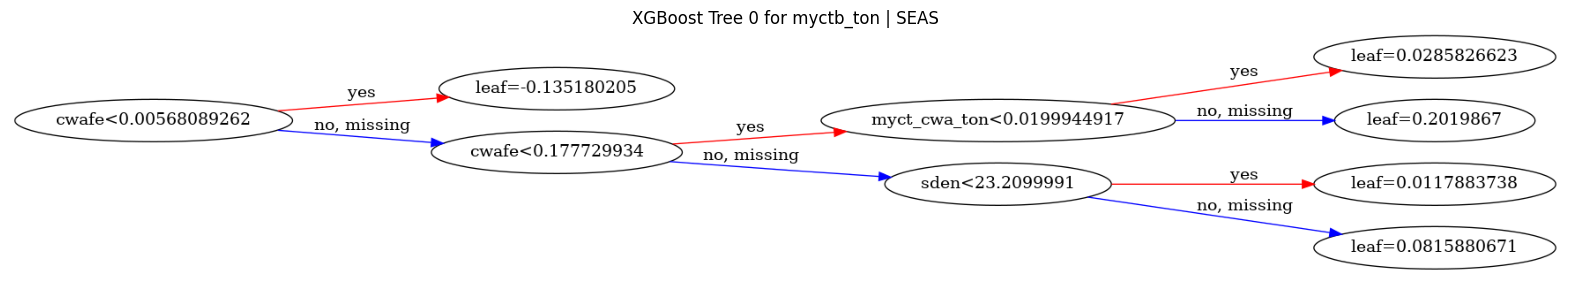

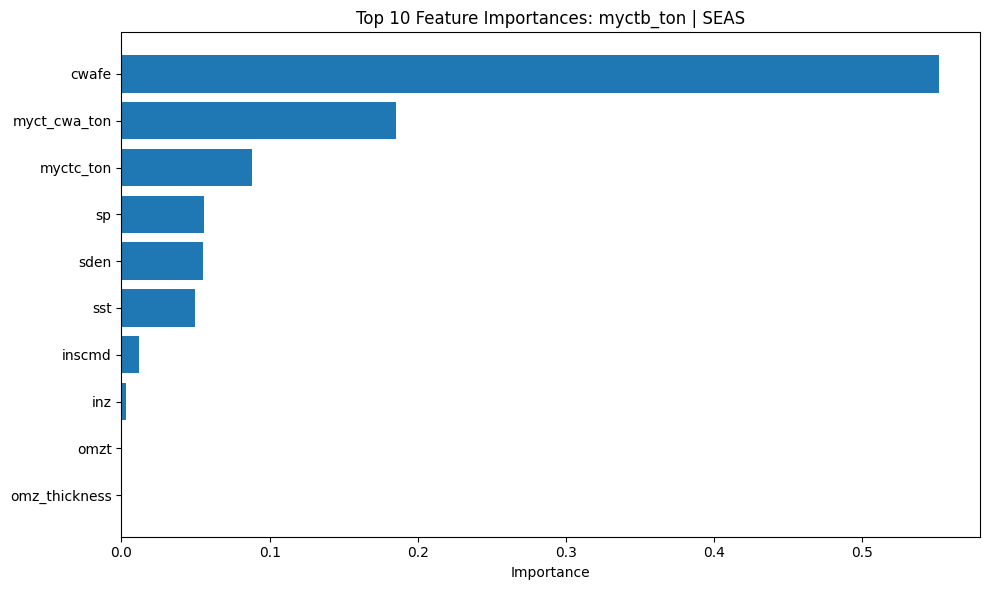


====== All Target Summary | SEAS ======
area       target  train_rmse  test_rmse  train_r2  test_r2  train_nse  test_nse status
SEAS    myctc_ton       0.000      0.000     0.976    0.991      0.976     0.991   Good
SEAS myct_cwa_ton       0.000      0.000     0.976    0.997      0.976     0.997   Good
SEAS        cwafe       0.000      0.000     0.990    0.994      0.990     0.994   Good
SEAS    myctb_ton       0.211      3.492     0.985    0.730      0.985     0.730   Good
CPU times: user 7.52 s, sys: 160 ms, total: 7.68 s
Wall time: 11.6 s


In [24]:
%%time

# exclude = ['area', 'd/n']
# target_cols = ['myctc_ton', 'myct_cwa_ton', 'cwafe', 'myctb_ton'] #'myct_cwa_ton'


# for target in target_cols:
#     best_model, best_params, best_rmse, features, importance_feature = tune_xgboost_model(
#         df_seas, target=target, exclude_cols=exclude, target_cols=target_cols, area='SEAS', n_iter=50
#     )
    
    
#     # Plot the first tree of the best model
    
#     plot_tree(best_model, num_trees=0, rankdir='LR')
#     fig = plt.gcf()
#     fig.set_size_inches(20, 15)
#     plt.title(f"XGBoost Tree 0 for {target} | SEAS")
#     plt.show()

#     # Plot feature importances
#     plot_feature_importances(importance_feature, target=target, area='SEAS')

# %%time

exclude = ['area', 'd/n']
target_cols = ['myctc_ton', 'myct_cwa_ton', 'cwafe', 'myctb_ton']

all_metrics_seas = []

for target in target_cols:
    best_model, metrics_df, best_params, features, importance_feature = tune_xgboost_model(
        df_seas, target=target, exclude_cols=exclude, target_cols=target_cols, area='SEAS', n_iter=50
    )
    
    all_metrics_seas.append(metrics_df)  # Collect each result

    # Plot the first tree of the best model
    plot_tree(best_model, num_trees=0, rankdir='LR')
    fig = plt.gcf()
    fig.set_size_inches(20, 15)
    plt.title(f"XGBoost Tree 0 for {target} | SEAS")
    plt.show()

    # Plot feature importances
    plot_feature_importances(importance_feature, target=target, area='SEAS')

# Final combined output
final_metrics_seas = pd.concat(all_metrics_seas, ignore_index=True)
print("\n====== All Target Summary | SEAS ======")
print(final_metrics_seas.to_string(index=False))


# Sensitivity Analysis

## Premutation Importance and ICE (Individual Conditional Expectation) Analysis

| Type                     | Method name                              | Level                      | Output                                      | Purpose                        |
| ------------------------ | ---------------------------------------- | -------------------------- | ------------------------------------------- | ------------------------------ |
| **Global sensitivity analysis (GSA)**   | Permutation importance                   | Global                     | Drop in R²                                  | Overall predictor importance   |
| **Local sensitivity analysis (LSA)**    | ICE (Individual Conditional Expectation) | Local                      | Partial prediction responses                | Direction, strength, stability |
| **Quantitative summary**                | ICE-based metrics                        | Local → Global aggregation | Effect range, direction, interaction spread | Summarized predictor influence |


### **Permutation importance = global model sensitivity to each predictor.**
You measured how much the model’s predictive accuracy (R²) changes\
when you randomly shuffle one predictor at a time.\
\
This tests how sensitive the model’s overall performance is\
to the integrity of each input variable.

### **ICE (Individual Conditional Expectation) plots = local sensitivity of the prediction to each variable.**
You systematically changed one predictor’s value\
while keeping all other features fixed for each sample,\
and observed how the model’s prediction responded.\
\
That’s a local sensitivity test — it shows how individual predictions react\
to small or large changes in one variable.

"“I reuse already trained model and predict the target value (single value) using the single values of other features including the feature that is changed to check that feature’s sensitivity.
And it only for one row only. And not considering the rest of the rows.”"


### **Partial Dependence Plot (PDP)**
PDP shows how the average model prediction (y-axis) changes as a feature value (x-axis) varies.\

It represents the mean of all ICE curves, summarizing the global effect of that feature on the model output.\

Tiny tick marks along the x-axis are called rug marks — they show the distribution of data points for that feature:\

    Many ticks close together → dense data region (model is well-supported here).

    Few or no ticks → sparse data region (model is extrapolating; predictions are less reliable there).

### **Quantitative ICE summary**
You then summarized ICE results numerically with three metrics

       Effect range (Δy): strength of influence

       Direction: sign of the relationship

       Interaction spread: variability across samples (nonlinearity or interaction strength)

This step turned the local ICE results into a quantitative local sensitivity measure.

In [25]:
# Run sensitivity (permutation importance + ICE summaries) for saved models and
# produce a single combined CSV keyed on 'feature'.


import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
from sklearn.inspection import PartialDependenceDisplay


# output dir
os.makedirs('saved_models/myct/sensitivity_results', exist_ok=True)

save_dir = "saved_models/myct/sensitivity_results"
ice_out_dir = os.path.join(save_dir, "ice_plots")
os.makedirs(ice_out_dir, exist_ok=True)

pdp_out_dir = os.path.join(save_dir, "pdp_plots")
os.makedirs(pdp_out_dir, exist_ok=True)


areas = ['NEAS', 'SEAS']
target_cols = ['myctc_ton', 'myct_cwa_ton', 'cwafe', 'myctb_ton']
n_repeats = 20  # increase for stability if you want

def ensure_df(X, features):
    """Return X as DataFrame with given columns."""
    if isinstance(X, pd.DataFrame):
        return X
    return pd.DataFrame(X, columns=features)

def plot_ice_summary_and_save(model, X, features, top_features, filename_png,
                              sample_size=200, grid_resolution=50, center=False):
    """
    Robust ICE summary:
    - ensures a summary row for every feature in top_features
    - handles constant features by expanding grid slightly
    - catches per-feature errors and returns NaNs instead of skipping
    - always returns a DataFrame with columns:
      ['feature','effect_range','direction','interaction_spread']
    """
    X = X.copy().reset_index(drop=True)
    cols = list(X.columns)

    if sample_size is None or sample_size >= len(X):
        sample_idx = np.arange(len(X))
    else:
        sample_idx = np.random.RandomState(42).choice(len(X), size=sample_size, replace=False)

    # Prepare plotting (keep same layout as before)
    n_plots = len(top_features)
    ncols = 2
    nrows = int(np.ceil(n_plots / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*3.5))
    axes = axes.flatten()

    summary_list = []

    for i, feat in enumerate(top_features):
        ax = axes[i] if i < len(axes) else None

        # default summary values (used if any error happens)
        summary = {"feature": feat, "effect_range": np.nan, "direction": None, "interaction_spread": np.nan}

        try:
            if feat not in cols:
                # feature not present: leave NaNs but continue (ensures a row exists)
                if ax is not None:
                    ax.set_visible(False)
                summary_list.append(summary)
                continue

            col_idx = cols.index(feat)
            col_vals = X.iloc[:, col_idx].to_numpy()

            # handle constant feature values by expanding grid slightly
            vmin = np.nanmin(col_vals)
            vmax = np.nanmax(col_vals)
            if np.isnan(vmin) or np.isnan(vmax):
                # all-NaN column -> can't compute
                raise ValueError(f"Feature {feat} contains only NaNs")

            if np.isclose(vmin, vmax):
                eps = 1e-6 if np.issubdtype(col_vals.dtype, np.number) else 0
                vmin = vmin - eps
                vmax = vmax + eps

            grid = np.linspace(vmin, vmax, max(5, grid_resolution))

            preds = np.zeros((len(sample_idx), len(grid)))
            for j, ridx in enumerate(sample_idx):
                row = X.iloc[ridx].to_numpy().copy()
                X_rep = np.tile(row, (len(grid), 1))
                X_rep[:, col_idx] = grid
                preds[j, :] = model.predict(X_rep)

            if center:
                preds = preds - preds[:, [0]]

            median = np.median(preds, axis=0) #np.mean(preds, axis=0)
            low = np.percentile(preds, 10, axis=0)
            high = np.percentile(preds, 90, axis=0)

            summary = {
                "feature": feat,
                "effect_range": float(np.nanmax(median) - np.nanmin(median)) if not np.all(np.isnan(median)) else np.nan,
                "direction": None if np.isnan(median[0]) or np.isnan(median[-1]) else ("positive" if median[-1] > median[0] else "negative"),
                "interaction_spread": float(np.nanmean(high - low)) if not np.all(np.isnan(high - low)) else np.nan
            }

            # plotting (only if ax exists)
            if ax is not None:
                sample_lines = min(30, len(sample_idx))
                for k in np.random.RandomState(1).choice(len(sample_idx), size=sample_lines, replace=False):
                    ax.plot(grid, preds[k, :], color='gray', alpha=0.7, linewidth=0.7)
                ax.fill_between(grid, low, high, alpha=0.25)
                ax.plot(grid, median, color='black', linewidth=2)
                ax.set_title(feat)
                ax.set_xlabel(feat)
                ax.set_ylabel("Predicted")
                ax.grid(alpha=0.2)

        except Exception as e:
            # log the feature-level error but still append a row so nothing is missing in the summary
            print(f"ICE warning for feature '{feat}': {e}")
            # leave summary as NaNs/None

        summary_list.append(summary)

    # clean up axes beyond n_plots
    for j in range(n_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    try:
        fig.savefig(filename_png, dpi=200)
    except Exception as e:
        print(f"Warning: could not save ICE plot to {filename_png}: {e}")
    finally:
        plt.close(fig)

    return pd.DataFrame(summary_list)



# --- Accumulator for combined results (one CSV) ---
combined_results = []

for area in areas:
    for target in target_cols:
        base = f"saved_models/myct/{area}_{target}"
        model_path = base + "_model.pkl"
        test_path = base + "_test_split.pkl"
        features_path = base + "_features.pkl"
        importance_path = base + "_importance_feature.pkl"

        if not os.path.exists(model_path):
            print(f"Skipping {area}_{target} — no saved model at {model_path}")
            continue

        # load model
        try:
            model = joblib.load(model_path)
        except Exception as e:
            print(f"Failed loading model {model_path}: {e}")
            continue

        # load features (if saved)
        features = None
        if os.path.exists(features_path):
            try:
                features = joblib.load(features_path)
            except Exception as e:
                print(f"Warning: failed loading features from {features_path}: {e}")
                features = None

        # load test split (must have been saved earlier)
        if os.path.exists(test_path):
            try:
                X_test, y_test = joblib.load(test_path)
                if features is not None:
                    X_test = ensure_df(X_test, features)
                else:
                    if not isinstance(X_test, pd.DataFrame):
                        X_test = pd.DataFrame(X_test)
            except Exception as e:
                print(f"Skipping {area}_{target} — failed loading test split at {test_path}: {e}")
                continue
        else:
            print(f"Skipping {area}_{target} — no test split saved at {test_path}")
            continue

        # compute baseline test R² for sanity
        try:
            yhat_test = model.predict(X_test)
            test_r2 = r2_score(y_test, yhat_test)
            print(f"{area} {target} | Test R²: {test_r2:.3f}")
        except Exception as e:
            print(f"Warning: failed to compute test R^2 for {area}_{target}: {e}")
            test_r2 = np.nan

        # permutation importance
        try:
            perm = permutation_importance(model, X_test, y_test, n_repeats=n_repeats,
                                          random_state=42, scoring='r2', n_jobs=-1)
            perm_df = pd.DataFrame({
                'feature': X_test.columns,
                'importance_mean': perm.importances_mean,
                'importance_std': perm.importances_std
            }).sort_values('importance_mean', ascending=False).reset_index(drop=True)
        except Exception as e:
            print(f"Failed computing permutation importance for {area}_{target}: {e}")
            perm_df = pd.DataFrame({
                'feature': list(X_test.columns),
                'importance_mean': [np.nan] * len(X_test.columns),
                'importance_std': [np.nan] * len(X_test.columns)
            })

        perm_df['area'] = area
        perm_df['target'] = target

        out_csv = f"saved_models/myct/sensitivity_results/sensitivity_{area}_{target}_perm.csv"
        try:
            perm_df.to_csv(out_csv, index=False)
            print(f"Saved permutation importance -> {out_csv}")
        except Exception as e:
            print(f"Warning: failed to save per-model perm CSV {out_csv}: {e}")

        # pick top features
        if os.path.exists(importance_path):
            try:
                importance_feature = joblib.load(importance_path)
                if isinstance(importance_feature, pd.DataFrame) and 'feature' in importance_feature.columns:
                    top_feats = importance_feature['feature'].tolist()[:6]
                elif isinstance(importance_feature, dict) and 'feature' in importance_feature:
                    top_feats = pd.Series(importance_feature['feature']).tolist()[:6]
                else:
                    top_feats = perm_df['feature'].head(6).tolist()
            except Exception as e:
                print(f"Warning: failed reading importance_feature from {importance_path}: {e}")
                top_feats = perm_df['feature'].head(6).tolist()
        else:
            top_feats = perm_df['feature'].head(6).tolist()

        # === ICE plot + summary ===
        png = f"saved_models/myct/sensitivity_results/ice_plots/sensitivity_{area}_{target}_ice.png"
        try:
            summary_df = plot_ice_summary_and_save(
                model,
                X_test,
                X_test.columns.tolist(),
                top_feats,
                png,
                sample_size=300,
                grid_resolution=60,
                center=False
            )
            print(f"Saved ICE plot -> {png}")
        except Exception as e:
            print(f"Failed ICE plotting for {area}_{target}: {e}")
            summary_df = pd.DataFrame(columns=["feature", "effect_range", "direction", "interaction_spread"])
        
        # === PDP subplot grid (NEW SECTION) ===
        from sklearn.inspection import PartialDependenceDisplay
        
        try:
            n_feats = len(top_feats)
            ncols = 2
            nrows = int(np.ceil(n_feats / ncols))
            fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 3.5))
            axes = axes.flatten()
        
            for i, feat in enumerate(top_feats):
                ax = axes[i]
                try:
                    display = PartialDependenceDisplay.from_estimator(
                        model,
                        X_test,
                        [feat],
                        grid_resolution=60,
                        ax=ax
                    )
                    ax.set_title(f"{feat}")
                    ax.set_xlabel(feat)
                    ax.set_ylabel("Predicted")
                    ax.grid(alpha=0.2)
                except Exception as e:
                    print(f"Failed PDP for {feat} ({area}-{target}): {e}")
                    ax.set_visible(False)
        
            # remove empty subplots
            for j in range(n_feats, len(axes)):
                fig.delaxes(axes[j])
        
            plt.suptitle(f"{area} | {target} | Partial Dependence (PDP)", fontsize=14, y=1.02)
            plt.tight_layout()
            pdp_png = f"saved_models/myct/sensitivity_results/pdp_plots/sensitivity_{area}_{target}_pdp.png"
            fig.savefig(pdp_png, dpi=200, bbox_inches="tight")
            plt.close(fig)
            print(f"Saved PDP subplot figure -> {pdp_png}")
        except Exception as e:
            print(f"Failed PDP plotting grid for {area}_{target}: {e}")

        # merge and append results
        perm_df['feature'] = perm_df['feature'].astype(str)
        summary_df['feature'] = summary_df['feature'].astype(str)
        summary_df['area'] = area
        summary_df['target'] = target

        try:
            merged = pd.merge(perm_df, summary_df.drop(columns=['area','target']),
                              on='feature', how='outer', sort=False)
            if 'area_x' in merged.columns and 'area_y' in merged.columns:
                merged['area'] = merged['area_x'].combine_first(merged['area_y'])
                merged.drop(columns=['area_x','area_y'], inplace=True)
            else:
                merged['area'] = area
            if 'target_x' in merged.columns and 'target_y' in merged.columns:
                merged['target'] = merged['target_x'].combine_first(merged['target_y'])
                merged.drop(columns=['target_x','target_y'], inplace=True)
            else:
                merged['target'] = target
        except Exception as e:
            print(f"Warning: merge failed for {area}_{target}: {e}")
            merged = perm_df.copy()
            for c in ['effect_range','direction','interaction_spread']:
                merged[c] = np.nan
            merged['area'] = area
            merged['target'] = target

        combined_results.append(merged)

# === Combine and save final CSV ===
if combined_results:
    final_df = pd.concat(combined_results, ignore_index=True, sort=False)
    cols = ['area', 'target', 'feature', 'importance_mean', 'importance_std',
            'effect_range', 'direction', 'interaction_spread']
    final_cols = [c for c in cols if c in final_df.columns] + [c for c in final_df.columns if c not in cols]
    final_df = final_df[final_cols]

    final_csv = "saved_models/myct/sensitivity_results/sensitivity_all_areas_targets.csv"
    try:
        final_df.to_csv(final_csv, index=False)
        print(f"Saved combined sensitivity CSV -> {final_csv}")
    except Exception as e:
        print(f"Failed to save combined CSV {final_csv}: {e}")
else:
    print("No results collected to save.")


NEAS myctc_ton | Test R²: 0.490
Saved permutation importance -> saved_models/myct/sensitivity_results/sensitivity_NEAS_myctc_ton_perm.csv
Saved ICE plot -> saved_models/myct/sensitivity_results/ice_plots/sensitivity_NEAS_myctc_ton_ice.png


/home/akashs/.local/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:995: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
/home/akashs/.local/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:995: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
/home/akashs/.local/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:995: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


Saved PDP subplot figure -> saved_models/myct/sensitivity_results/pdp_plots/sensitivity_NEAS_myctc_ton_pdp.png
NEAS myct_cwa_ton | Test R²: 0.933
Saved permutation importance -> saved_models/myct/sensitivity_results/sensitivity_NEAS_myct_cwa_ton_perm.csv
Saved ICE plot -> saved_models/myct/sensitivity_results/ice_plots/sensitivity_NEAS_myct_cwa_ton_ice.png
Saved PDP subplot figure -> saved_models/myct/sensitivity_results/pdp_plots/sensitivity_NEAS_myct_cwa_ton_pdp.png
NEAS cwafe | Test R²: 0.722
Saved permutation importance -> saved_models/myct/sensitivity_results/sensitivity_NEAS_cwafe_perm.csv
Saved ICE plot -> saved_models/myct/sensitivity_results/ice_plots/sensitivity_NEAS_cwafe_ice.png
Saved PDP subplot figure -> saved_models/myct/sensitivity_results/pdp_plots/sensitivity_NEAS_cwafe_pdp.png
NEAS myctb_ton | Test R²: 0.812
Saved permutation importance -> saved_models/myct/sensitivity_results/sensitivity_NEAS_myctb_ton_perm.csv
Saved ICE plot -> saved_models/myct/sensitivity_results

/home/akashs/.local/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:995: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
/home/akashs/.local/lib/python3.10/site-packages/sklearn/inspection/_plot/partial_dependence.py:995: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


Saved PDP subplot figure -> saved_models/myct/sensitivity_results/pdp_plots/sensitivity_SEAS_myctc_ton_pdp.png
SEAS myct_cwa_ton | Test R²: 0.997
Saved permutation importance -> saved_models/myct/sensitivity_results/sensitivity_SEAS_myct_cwa_ton_perm.csv
Saved ICE plot -> saved_models/myct/sensitivity_results/ice_plots/sensitivity_SEAS_myct_cwa_ton_ice.png
Saved PDP subplot figure -> saved_models/myct/sensitivity_results/pdp_plots/sensitivity_SEAS_myct_cwa_ton_pdp.png
SEAS cwafe | Test R²: 0.994
Saved permutation importance -> saved_models/myct/sensitivity_results/sensitivity_SEAS_cwafe_perm.csv
Saved ICE plot -> saved_models/myct/sensitivity_results/ice_plots/sensitivity_SEAS_cwafe_ice.png
Saved PDP subplot figure -> saved_models/myct/sensitivity_results/pdp_plots/sensitivity_SEAS_cwafe_pdp.png
SEAS myctb_ton | Test R²: 0.730
Saved permutation importance -> saved_models/myct/sensitivity_results/sensitivity_SEAS_myctb_ton_perm.csv
Saved ICE plot -> saved_models/myct/sensitivity_results

## summay  plot

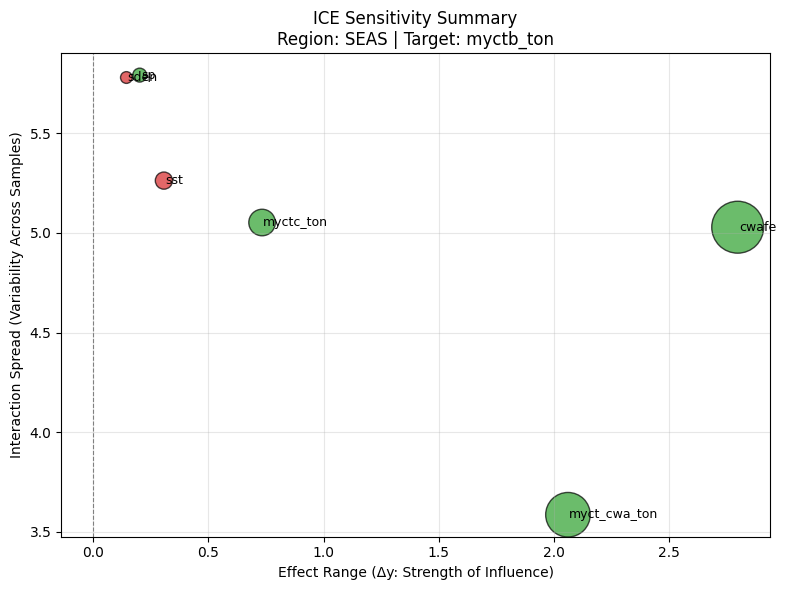

Saved ICE summary plot -> saved_models/myct/sensitivity_results/sensitivity_SEAS_myctb_ton_ice_summary_plot.png


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# # Convert collected results to DataFrame
# summary_df = pd.DataFrame(summary_list)
# summary_df 

# Encode direction as color
color_map = {'positive': 'tab:green', 'negative': 'tab:red'}
summary_df['color'] = summary_df['direction'].map(color_map)

plt.figure(figsize=(8, 6))
plt.scatter(
    summary_df["effect_range"],
    summary_df["interaction_spread"],
    s=summary_df["effect_range"] * 500,
    c=summary_df["color"],
    alpha=0.7, edgecolors="k"
)
for i, row in summary_df.iterrows():
    plt.text(row["effect_range"] + 0.005, row["interaction_spread"],
             row["feature"], fontsize=9, va='center')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel("Effect Range (Δy: Strength of Influence)")
plt.ylabel("Interaction Spread (Variability Across Samples)")
plt.title(f"ICE Sensitivity Summary\nRegion: {area} | Target: {target}")
plt.grid(alpha=0.3)
plt.tight_layout()

# Save each summary scatter uniquely
summary_plot = f"saved_models/myct/sensitivity_results/sensitivity_{area}_{target}_ice_summary_plot.png"
plt.savefig(summary_plot, dpi=200)
plt.show()
print(f"Saved ICE summary plot -> {summary_plot}")


## Premutation Importance plotting

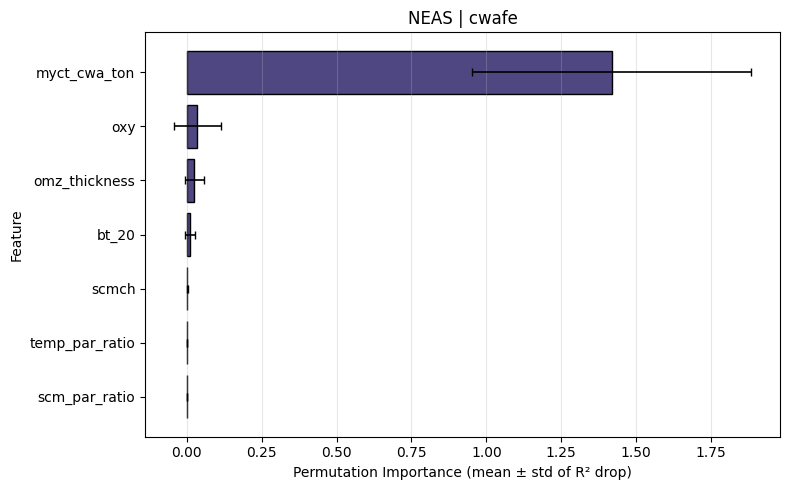

Saved: saved_models/myct/sensitivity_results/importance_plots/sensitivity_NEAS_cwafe_importance_bar.png


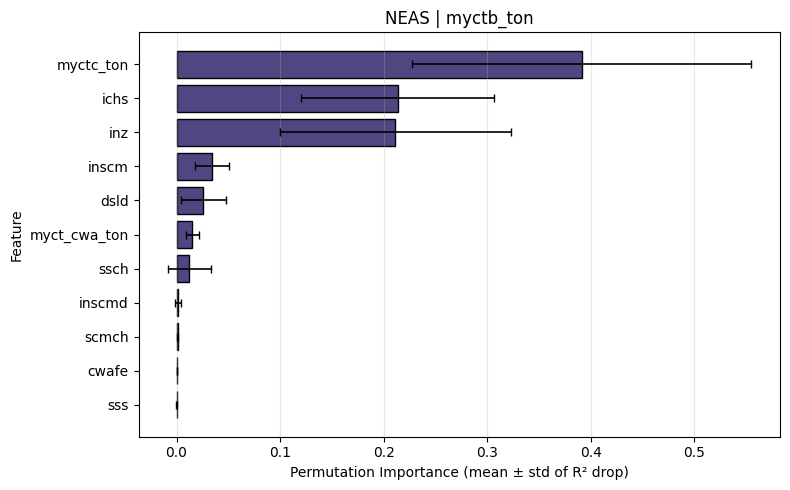

Saved: saved_models/myct/sensitivity_results/importance_plots/sensitivity_NEAS_myctb_ton_importance_bar.png


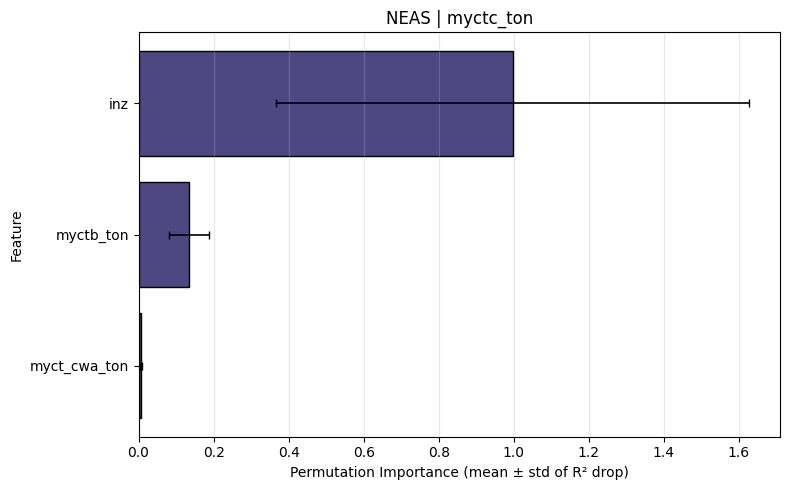

Saved: saved_models/myct/sensitivity_results/importance_plots/sensitivity_NEAS_myctc_ton_importance_bar.png


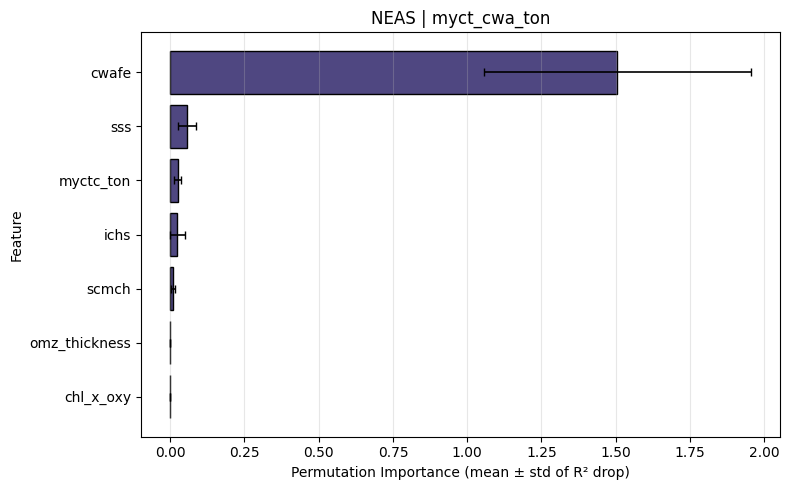

Saved: saved_models/myct/sensitivity_results/importance_plots/sensitivity_NEAS_myct_cwa_ton_importance_bar.png


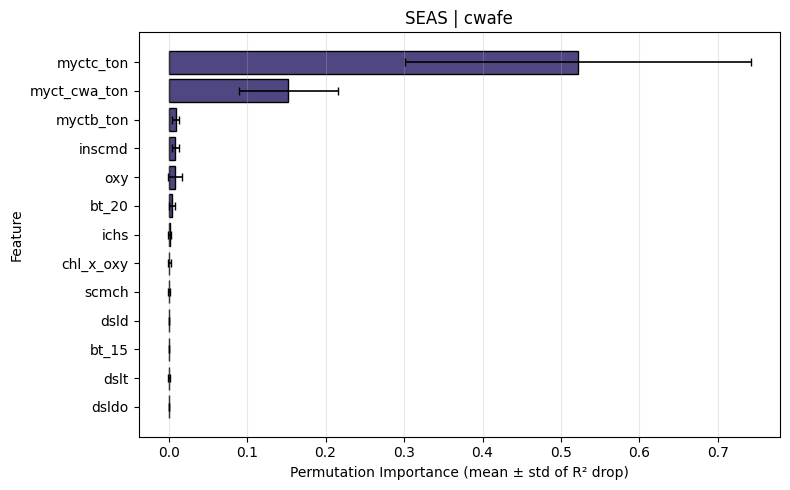

Saved: saved_models/myct/sensitivity_results/importance_plots/sensitivity_SEAS_cwafe_importance_bar.png


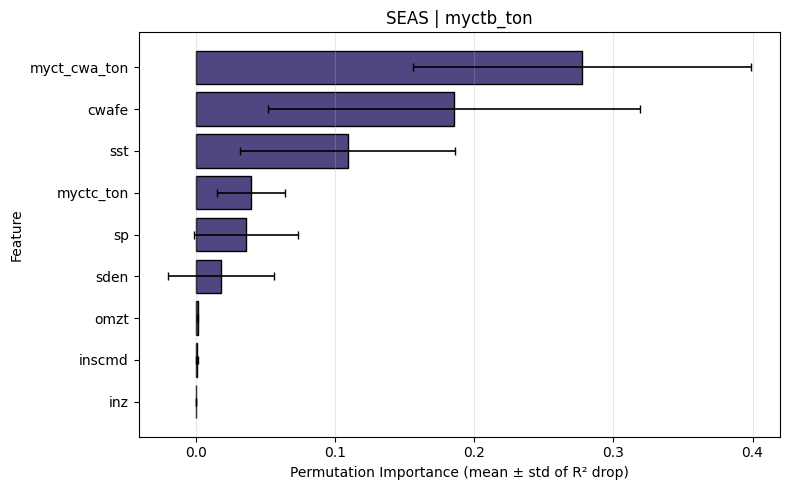

Saved: saved_models/myct/sensitivity_results/importance_plots/sensitivity_SEAS_myctb_ton_importance_bar.png


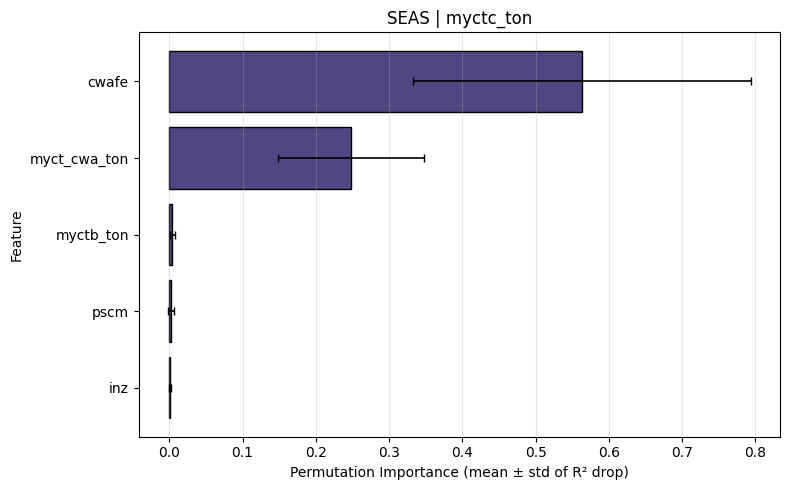

Saved: saved_models/myct/sensitivity_results/importance_plots/sensitivity_SEAS_myctc_ton_importance_bar.png


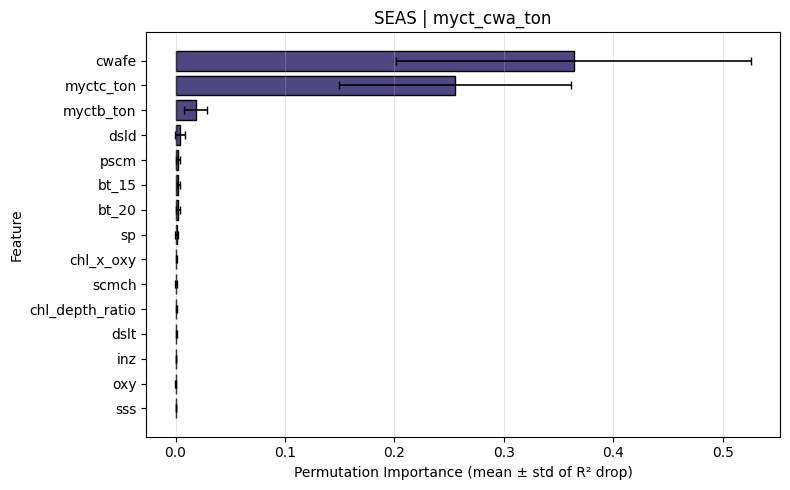

Saved: saved_models/myct/sensitivity_results/importance_plots/sensitivity_SEAS_myct_cwa_ton_importance_bar.png


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np

# Directory where your CSVs are stored
csv_dir = "saved_models/myct/sensitivity_results"
out_dir = os.path.join(csv_dir, "importance_plots")
os.makedirs(out_dir, exist_ok=True)

# Read all CSVs (one per region × target)
csv_files = glob.glob(os.path.join(csv_dir, "sensitivity_*_perm.csv"))

for csv_path in csv_files:
    df = pd.read_csv(csv_path)
    fname = os.path.basename(csv_path).replace("_perm.csv", "")
    region, target = fname.split("_")[1], "_".join(fname.split("_")[2:])  # works for e.g. NEAS_myctb_ton

    # filter out nearly zero values too (like 0.000001)
    df = df[df["importance_mean"].abs() > 1e-6]
    # Remove both zero and negative importances
    df = df[df["importance_mean"] > 0]


    # Sort by importance_mean
    df = df.sort_values("importance_mean", ascending=False).head(15)

    # --- Plot setup ---
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=df,
        y="feature",
        x="importance_mean",
        orient="h",
        color="darkslateblue",
        edgecolor="black"
    )

    # Add error bars for std
    plt.errorbar(
        x=df["importance_mean"],
        y=np.arange(len(df)),
        xerr=df["importance_std"],
        fmt="none",
        ecolor="black",
        elinewidth=1.2,
        capsize=3
    )

    plt.xlabel("Permutation Importance (mean ± std of R² drop)")
    plt.ylabel("Feature")
    plt.title(f"{region} | {target}")
    plt.grid(axis="x", alpha=0.3)
    plt.tight_layout()

    out_png = os.path.join(out_dir, f"{fname}_importance_bar.png")
    plt.savefig(out_png, dpi=200)
    # plt.close()
    plt.show()
    print(f"Saved: {out_png}")


# END OF CODE